# Sales Data Analysis
Use the basics understand from light exploratory data skills in data science practices.

The whole notebook complies to repository resouces [Solving real world data science tasks with Python Pandas!](https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git) by [Keith Galli](https://youtu.be/eMOA1pPVUc4?si=-UXWLdSFktCLWSh5)

## Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np

## Merging data from each month in sales data
path = "./Sales_Data"

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_data = pd.DataFrame()

for file in files:
    file_read = pd.read_csv(path + "/" + file)
    all_data = pd.concat([all_data, file_read])

all_data.to_csv("all_data.csv", index=False)

### READ THE IMPLICATION IN THE ALL_DATA.CSV

In [3]:
df = pd.read_csv("all_data.csv")
df.info()
df.describe()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


1. <u>Primary Data Intepretation:</u>

- The Data Summary shows no missing data from the six columns including 04 categorical data (OrderID, Product, Order Date, Purchase Address), 02 numberical data (Quantity Ordered, Price Each).

- The null values take small proportion of values counts (0.2%)

2. <u>Steps to Preprocessing Data</u>
- Search for the position of nulldata in every columns.
- Visuallize the heat map for nullData.

### Find rows of NAN

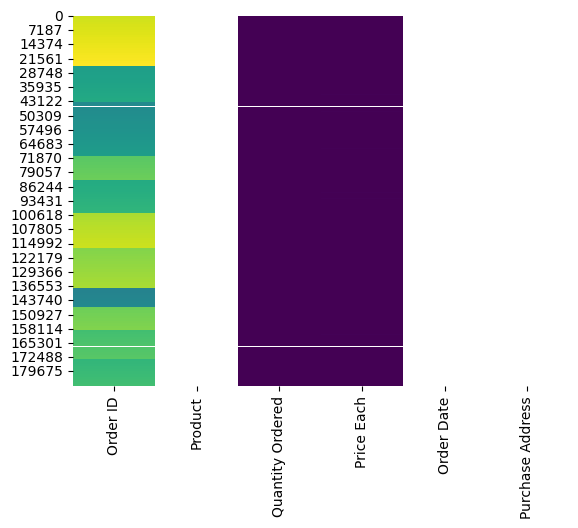

In [4]:
## Visualize missing values
import seaborn as sns

if df.isnull().values.any():
    numeric_df = df.apply(pd.to_numeric, errors='coerce')
    sns.heatmap(numeric_df[numeric_df.isnull().any(axis=1)], cbar=False, cmap='viridis')
else:
    print("No missing values to visualize.")


In [5]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Up the Data

In [6]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


* Format the 'Order Date' columns and Make columns correct type


In [7]:
df_catCol = ['Order ID', 'Product', 'Order Date', 'Purchase Address']
# df['Month'] = pd.to_datetime(df['Order Date']).dt.month
display(df['Order Date'].iloc[:255])

0      12/30/19 00:01
1      12/29/19 07:03
2      12/12/19 18:21
3      12/22/19 15:13
4      12/18/19 12:38
            ...      
250    12/21/19 11:28
251    12/13/19 16:44
252    12/27/19 18:56
253    12/05/19 20:02
254        Order Date
Name: Order Date, Length: 255, dtype: object

* Define not all 'Order Date' is in Date time format values. The existence of String data resist the format to data time type.

In [8]:
display(df[df['Order Date'].str[0:2] == 'Or'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**Get rid of text in 'Order Date' Column**

In [9]:
df = df[df['Order Date'].str[0:2] != 'Or']

**Make Column Correct Type and Add month Column**

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df.head()

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_2243/3819991553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


**Add Columns City (State)**

In [11]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['City'].head()

0     New York City
1     New York City
2     New York City
3     San Francisco
4           Atlanta
Name: City, dtype: object

**Use Function Approach to Get City**

In [12]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City (NY)
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA)


## Data Exploration

<u>Question 1A:</u>

- What is the best months for sales?

- And how much was earned that month?



In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

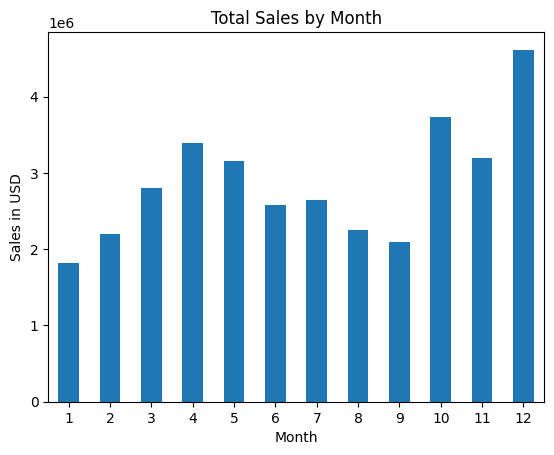

In [14]:
import matplotlib.pyplot as plt
month_sales = df.groupby('Month')['Sales'].sum()
month_sales.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.show()


<u>Question 1B:</u>

- What is the best sale/quantity products?

- Which region contributes most sales value in the first quarter (Jan to Apr) and the last 3 months?

In [15]:
##Table of purchases order by quantity and product sale price
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
product_sales
order_purchase = df.groupby('Product')['Quantity Ordered'].sum()
order_purchase
##Format Sales to 2 decimal places
product_sales = product_sales.apply(lambda x: '${:,.1f}'.format(x))

##Concatenate the two series into a DataFrame
product_sales = pd.concat([product_sales, order_purchase], axis=1)
product_sales

,Sales,Quantity Ordered
Product,,
Macbook Pro Laptop,"$8,037,600.0",4728
iPhone,"$4,794,300.0",6849
ThinkPad Laptop,"$4,129,958.7",4130
Google Phone,"$3,319,200.0",5532
27in 4K Gaming Monitor,"$2,435,097.6",6244
34in Ultrawide Monitor,"$2,355,558.0",6199
Apple Airpods Headphones,"$2,349,150.0",15661
Flatscreen TV,"$1,445,700.0",4819
Bose SoundSport Headphones,"$1,345,565.4",13457


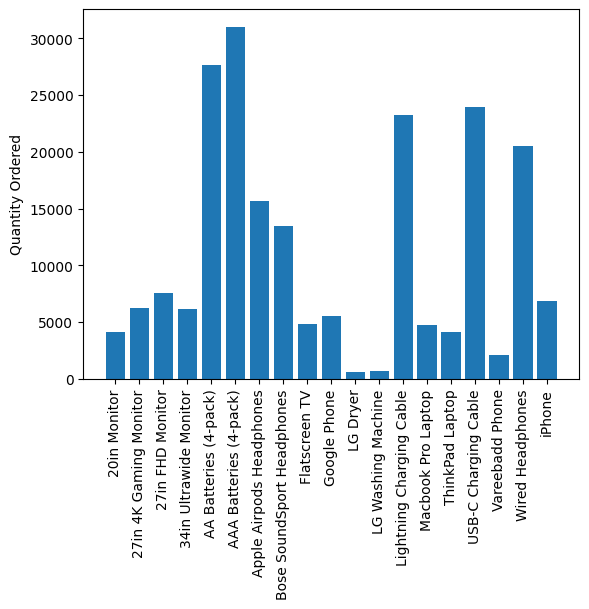

In [16]:
## Quantity Ordered by Product
product_groups = df.groupby('Product')
quantity_ordered = product_groups['Quantity Ordered'].sum()

products = [product for product, df in product_groups]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical')
plt.show()

  Order ID                   Product   Sales  Quantity Ordered
0   141234                    iPhone  700.00                 1
1   141235  Lightning Charging Cable   14.95                 1
2   141236          Wired Headphones   23.98                 2
3   141237          27in FHD Monitor  149.99                 1
4   141238          Wired Headphones   11.99                 1


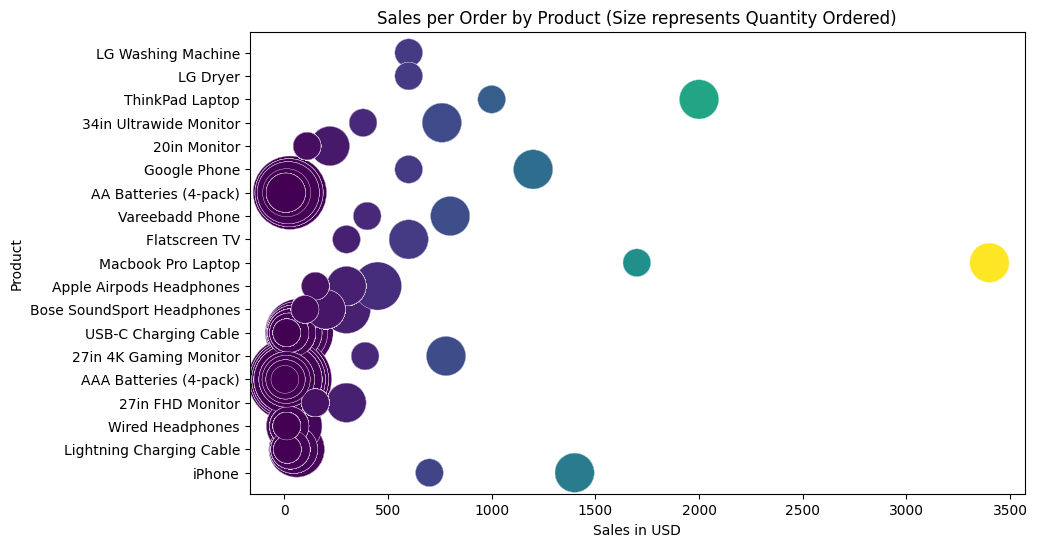

In [17]:
# Scatter Plot with size of sales volumes
order_product_sales = df.groupby(['Order ID', 'Product'])['Sales'].sum().reset_index()
order_product_sales['Quantity Ordered'] = df.groupby(['Order ID', 'Product'])['Quantity Ordered'].sum().reset_index(drop=True)
print(order_product_sales.head())

# Calculate the size of the markers based on the quantity ordered
order_product_sales['Size'] = order_product_sales['Quantity Ordered'].astype(float)

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(order_product_sales['Sales'], order_product_sales['Product'], s=order_product_sales['Size']*400, c=order_product_sales['Sales'], cmap='viridis', edgecolor='w', linewidth=0.25)
plt.ylabel('Product')
plt.xlabel('Sales in USD')
plt.title('Sales per Order by Product (Size represents Quantity Ordered)')
plt.show()

Computes the percentage change between the current and a prior element (percentage change in sales for each quarter compared to the previous quarter).

Quarter                      1           2           3           4
City                                                              
Atlanta (GA)               NaN         NaN         NaN         NaN
Austin (TX)         -36.968335  -35.760509  -30.741767  -35.465284
Boston (MA)         104.004624   96.356426  103.695641  101.917308
Dallas (TX)         -22.933288  -24.607009  -28.604343  -22.449251
Los Angeles (CA)     91.960027  112.463475   96.710570   88.583386
New York City (NY)  -12.009054  -19.431589  -12.322029  -13.043357
Portland (ME)       -91.098555  -89.209050  -89.871703  -91.102547
Portland (OR)       343.688788  291.244546  275.280554  350.987938
San Francisco (CA)  354.829631  331.199784  351.141192  336.910728
Seattle (WA)        -68.316337  -68.134745  -66.047933  -65.078305


<Figure size 1200x800 with 0 Axes>

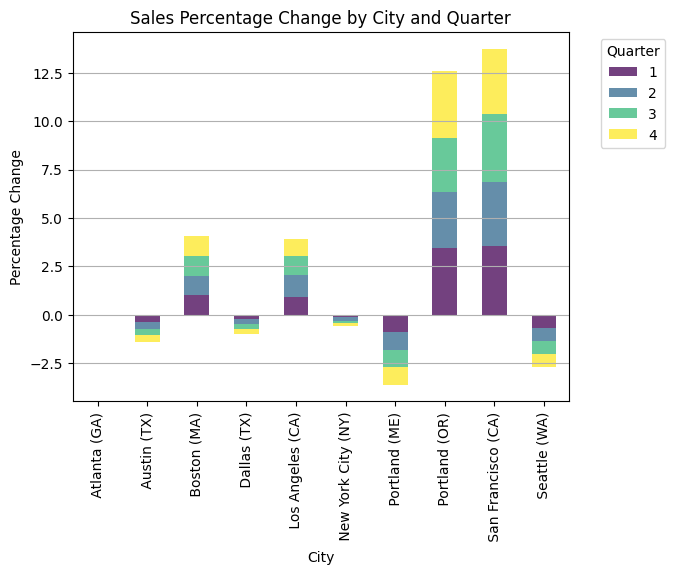

In [18]:

# Calculate the percentage change in sales for each quarter compared to the previous quarter
quarter = df['Order Date'].dt.quarter
df['Quarter'] = quarter
city_sales = df.groupby(['City','Quarter'])['Sales'].sum().unstack()
quarter_sales_pct_change =city_sales.pct_change()*100

# Display the percentage change
print(quarter_sales_pct_change)

# # Plot the percentage change in sales for each city by quarter use 100 percent stacked bar chart
plt.figure(figsize=(12, 8))
quarter_sales_pct_change.div(100).plot(kind='bar', stacked=True, colormap='viridis', alpha=0.75)
plt.title('Sales Percentage Change by City and Quarter')
plt.xlabel('City')
plt.ylabel('Percentage Change')
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.show()



<u>Question 2a:</u>
- What city sold the most product?

City sold most Product:  San Francisco (CA) by 8262203.91
                  City  Unique Orders       Sales
0         Atlanta (GA)          14253  2795498.58
1          Austin (TX)           9509  1819581.75
2          Boston (MA)          19092  3661642.01
3          Dallas (TX)          14240  2767975.40
4     Los Angeles (CA)          28498  5452570.80
5   New York City (NY)          23848  4664317.43
6        Portland (ME)           2363   449758.27
7        Portland (OR)           9617  1870732.34
8   San Francisco (CA)          42898  8262203.91
9         Seattle (WA)          14119  2747755.48


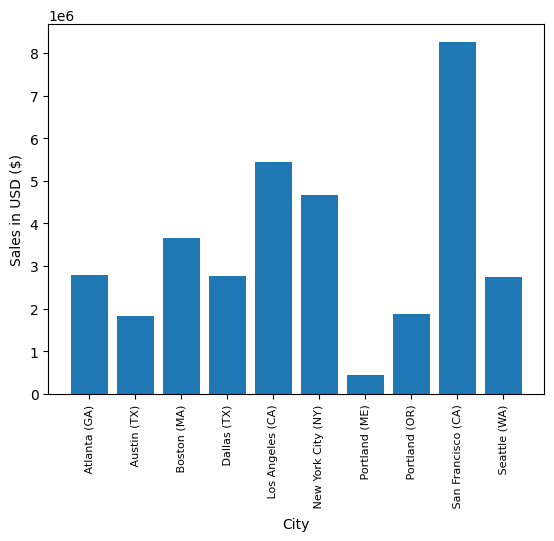

In [19]:
df.groupby('City')['Sales'].sum()
print(f'City sold most Product: {df.groupby("City")["Sales"].sum().idxmax()} by {df.groupby("City")["Sales"].sum().max()}')
keys = [city for city in df.groupby(['City']).groups.keys()]

# Group by 'City' and 'Order ID' to get the count of unique Order IDs per city
orders_per_city = df.groupby('City')['Order ID'].nunique().reset_index()
orders_per_city.rename(columns={'Order ID': 'Unique Orders'}, inplace=True)
orders_per_city = pd.concat([orders_per_city, df.groupby('City')['Sales'].sum().reset_index(drop=True)], axis=1)

# Display the first few rows of the resulting DataFrame
print(orders_per_city.head(20))

plt.bar(keys, df.groupby('City')['Sales'].sum())
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

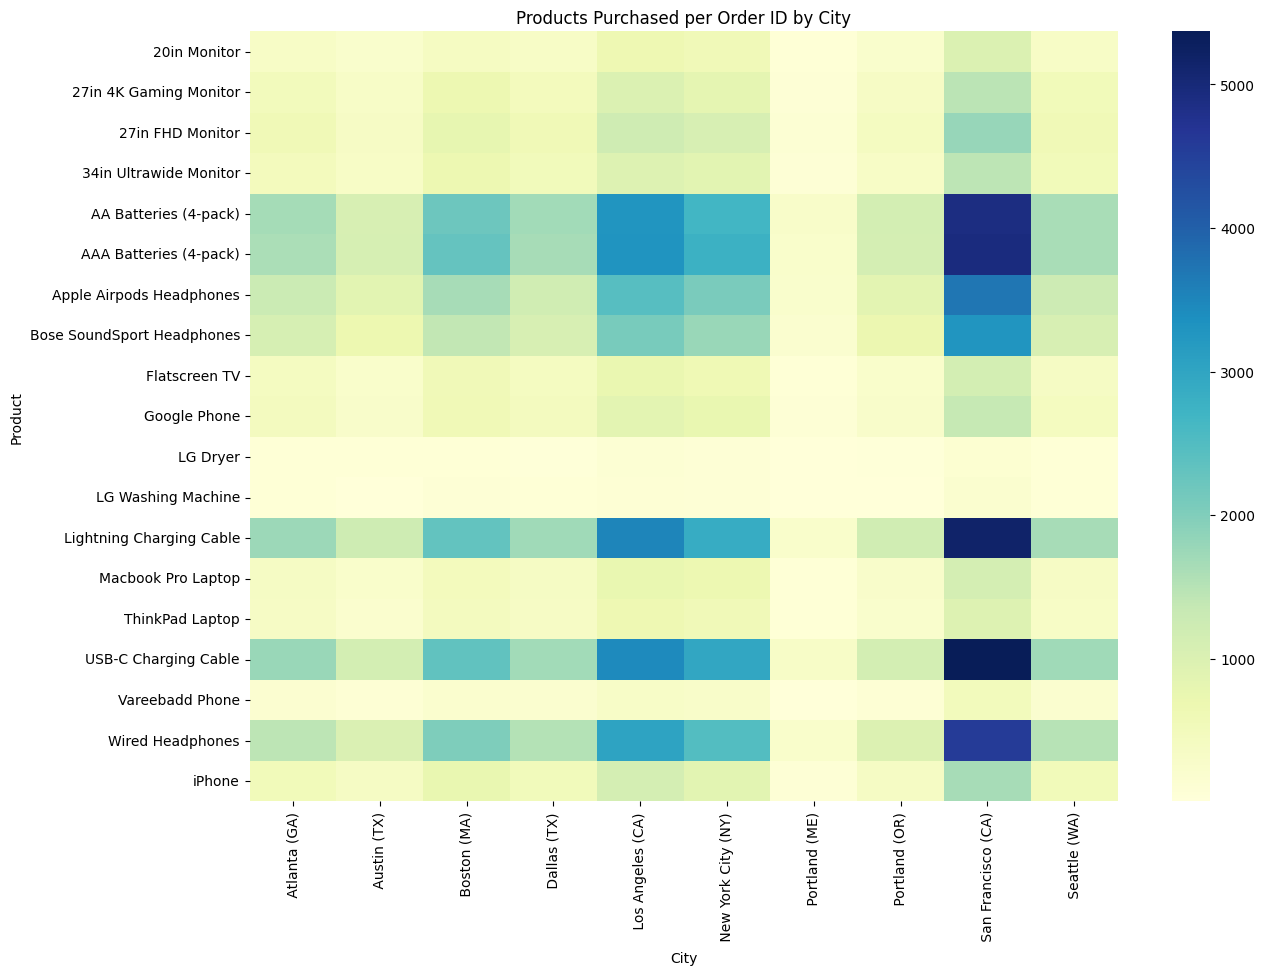

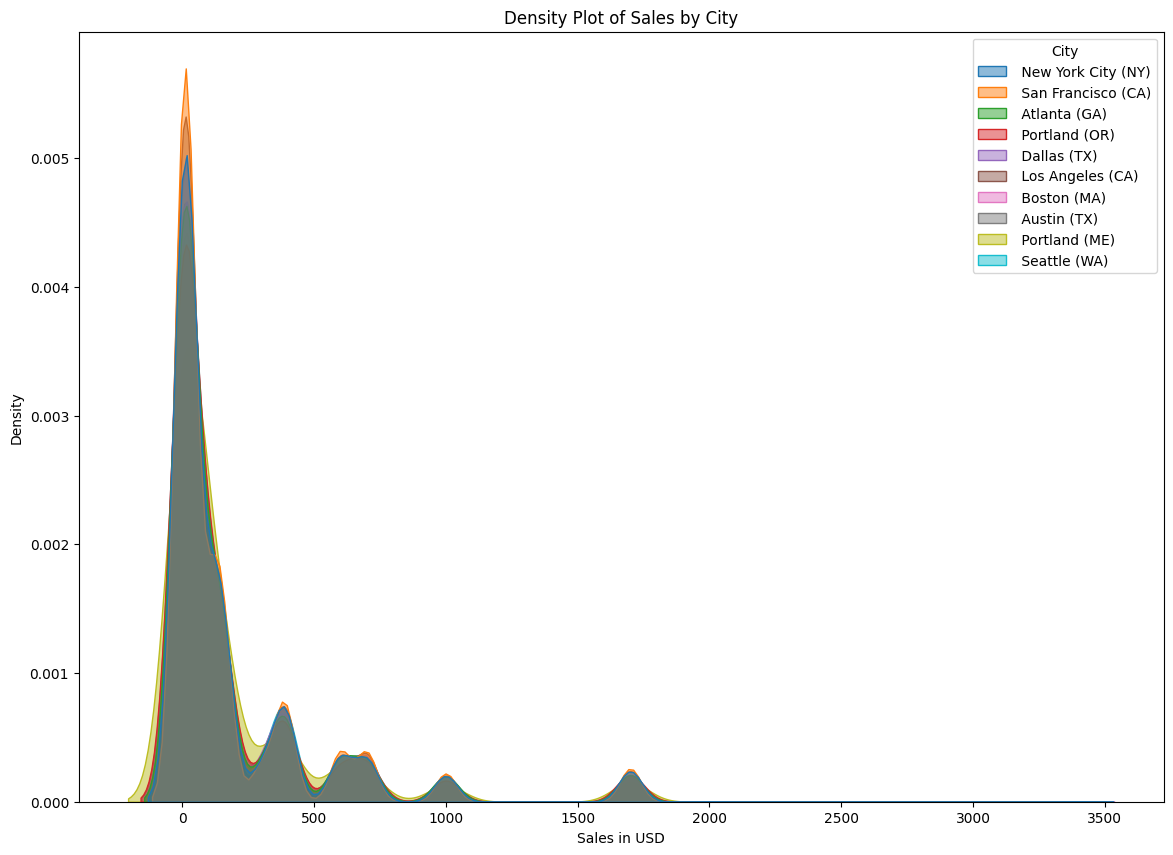

In [20]:
# Plot the products purchased per order ID by city
fig, ax = plt.subplots(figsize=(14, 10))
df.groupby(['Product', 'City'])['Order ID'].count().reset_index().sort_values('Order ID', ascending=False)

# Create a pivot table to get the count of products purchased per order ID by city
products_per_order_city = df.pivot_table(index='Product', columns='City', values='Order ID', aggfunc='count', fill_value=0)

# Plot the heatmap
sns.heatmap(products_per_order_city, cmap='YlGnBu', ax=ax)
plt.title('Products Purchased per Order ID by City')
plt.xlabel('City')
plt.ylabel('Product')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Density plot and estimate
fig, ax = plt.subplots(figsize=(14, 10))
sns.kdeplot(data=df, x='Sales', hue='City', fill=True, common_norm=False, alpha=0.5, ax=ax)
plt.title('Density Plot of Sales by City')
plt.xlabel('Sales in USD')
plt.ylabel('Density')
plt.show()

- The sale values distributes evenly between city. The Density show the values of sales through city concentrate on ranges 
    *  [0,250], [250,400];
    * [500,550];
    * [700,1200];
    * [1500,1750].

* Show the number of unique orders for each city.

<u>Question 2:</u>

- What is the best sale products of each months?

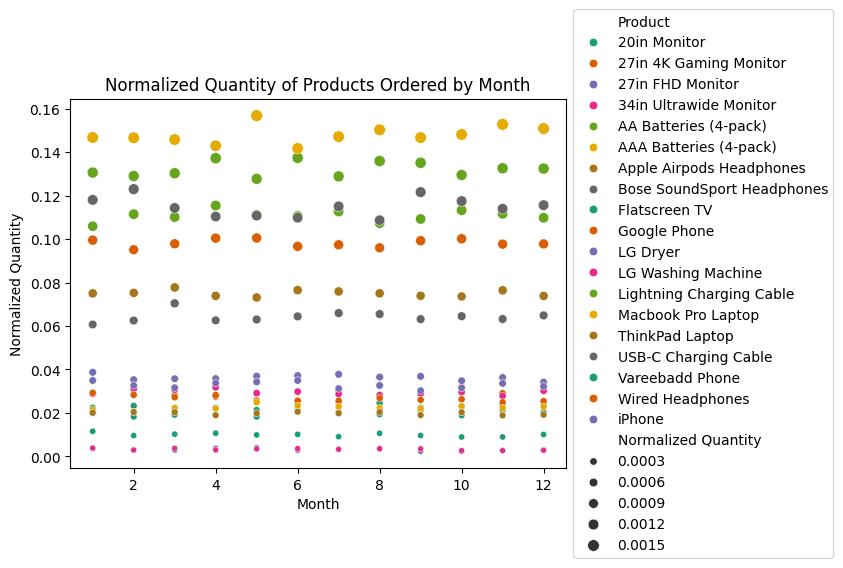

In [21]:
if 'Month' not in df.columns:
    df['Month'] = df['Order Date'].dt.month

orderProductByMonths = df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()
# orderProductByMonths['Sum'] = orderProductByMonths.sum(axis=1)
orderProductByMonths
# Calculate the total quantity ordered per month
totalQuantityByMonth = df.groupby('Month')['Quantity Ordered'].sum().reset_index()
totalQuantityByMonth.rename(columns={'Quantity Ordered': 'Total Quantity Ordered'}, inplace=True)
# Merge the monthly totals with the monthly product orders
normalized_orders = pd.merge(orderProductByMonths, totalQuantityByMonth, on='Month')

# Normalize the quantity ordered by the total quantity ordered per month
normalized_orders['Normalized Quantity'] = normalized_orders['Quantity Ordered'] / normalized_orders['Total Quantity Ordered']
size = normalized_orders['Normalized Quantity']/100
sns.scatterplot(data=normalized_orders, x='Month', y='Normalized Quantity', hue='Product', palette='Dark2', size=size)
plt.title('Normalized Quantity of Products Ordered by Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()


- Which region contributes most sales value in the first quarter (Jan to Apr) and the last 3 months?

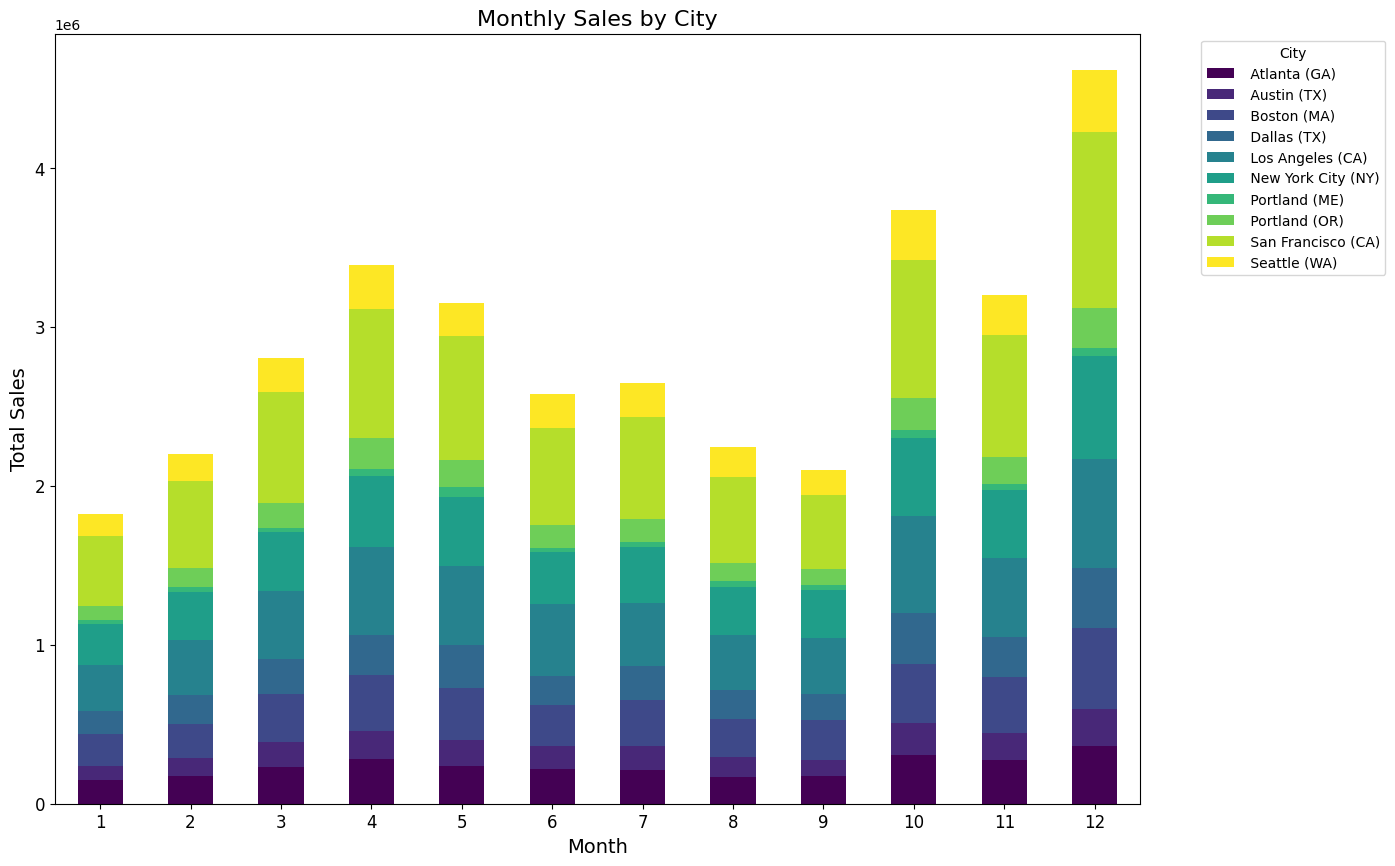

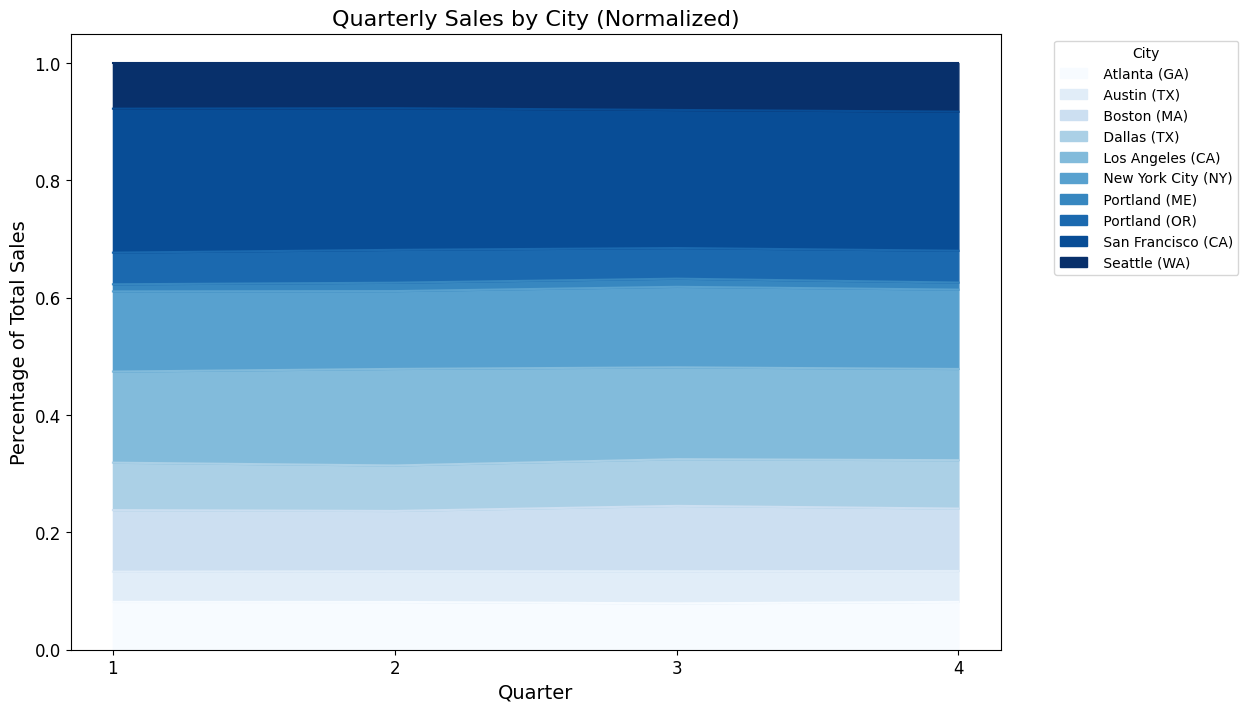

In [22]:
##- Which region contributes most sales value in the first quarter (Jan to Apr) and the last 3 months?
# Plot the sale by city by month using 100 percent stacked bar
city_sales_month_normalized = df.groupby(['Month', 'City'])['Sales'].sum().unstack()
# city_sales_month_normalized = city_sales_month_normalized.div(city_sales_month_normalized.sum(axis=1), axis=0)
city_sales_month_normalized.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
plt.title('Monthly Sales by City', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

df['Quarter'] = df['Order Date'].dt.quarter
df.head()
city_sales = df.groupby(['City', 'Quarter'])['Sales'].sum().sort_values(ascending=False)
city_sales
city_sales = city_sales.unstack()
city_sales

# Calculate the total sales for each quarter
total_sales = df.groupby('Quarter')['Sales'].sum()

# Mapping the Order ID with City and their corresponding Sales
order_city_sales = df.groupby(['Order ID', 'City'])['Sales'].sum().reset_index()
order_city_sales.head()

# Plot the sale by city by quarter using 100 percent stacked bar
city_sales_normalized = df.groupby(['Quarter', 'City'])['Sales'].sum().unstack()
city_sales_normalized = city_sales_normalized.div(city_sales_normalized.sum(axis=1), axis=0)
city_sales_normalized.plot(kind='area', stacked=True, figsize=(12, 8), colormap='Blues')
plt.title('Quarterly Sales by City (Normalized)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Percentage of Total Sales', fontsize=14)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=0, fontsize=12, ticks=[1, 2, 3, 4])
plt.yticks(fontsize=12)
plt.show()


<u>Question 3:</u>
- What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Quarter,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,4,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,4,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,4,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,4,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,4,12,38,1


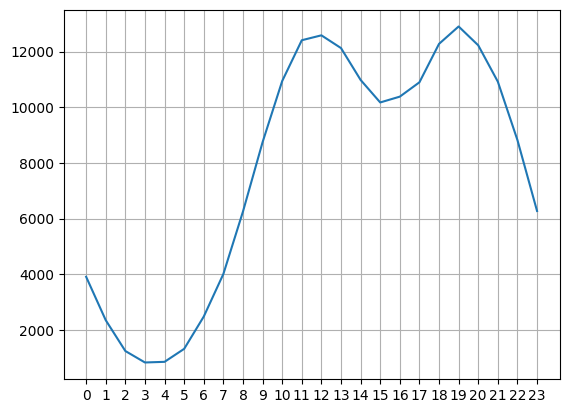

In [24]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks([key[0] for key in keys])
plt.grid()
plt.show()


* What products are most often sold together?

In [25]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_2243/3273574387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


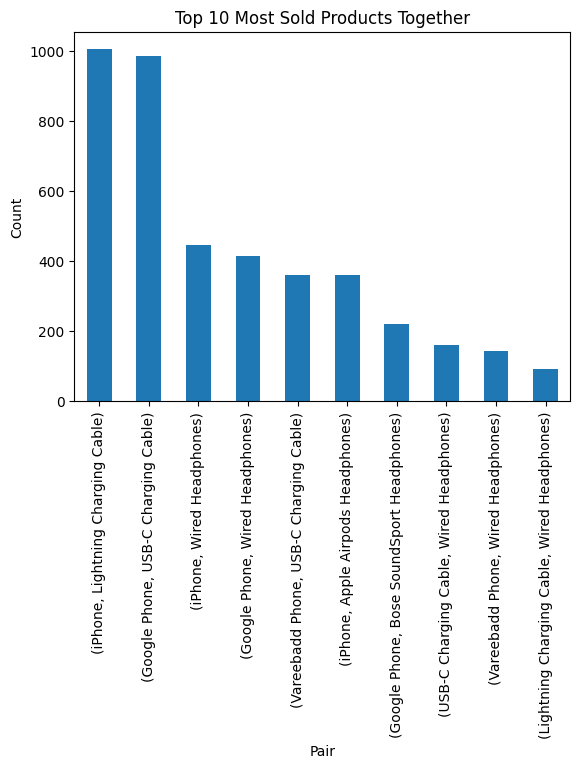

In [26]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

# Convert Counter to DataFrame
count_df = pd.DataFrame(count.most_common(10), columns=['Pair', 'Count'])

# Plot the DataFrame
count_df.plot(kind='bar', x='Pair', y='Count', legend=False)
plt.ylabel('Count')
plt.xlabel('Pair')
plt.title('Top 10 Most Sold Products Together')
plt.show()

**Dual-axis Plots**
Charts details:
- X-axis represent different products;
- Left Y-axis show the total quantity ordered fro each product;
- Right Y-axis displays the average price per order for each prodcuts.

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_2243/948603405.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_2243/948603405.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


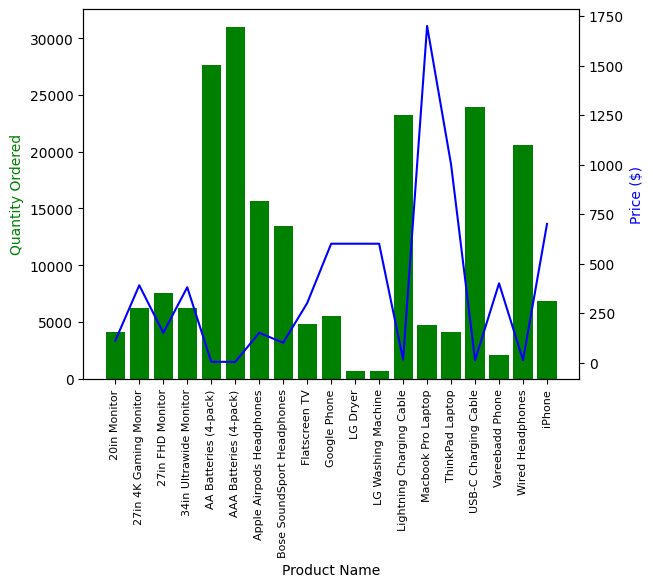

In [27]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

# product_groups = df.groupby('Product')
# quantity_ordered = product_groups['Quantity Ordered'].sum()
products = [product for product, df in product_groups]
prices = product_groups['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, order_purchase, color='g')
# ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()